In [1]:
# import sys
# sys.path.append('/mnt/disk1/yunseob/Pytorch/1_CapsuleEndo/')
from CE_utils import sm160_dataset, load_data, batch_idxs, GenerateLabel
from CE_DL_evl import CE_Model

import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

import torch
from torch import nn
from torch.nn import functional as F

In [2]:
sm160 = sm160_dataset(phase = 'test', data = 'sm_x160_v2', pre_a = [0, 0, 0], pre_b = False, ext_name = False)

neg_test_x = sm160.load_data('n', 'neg')
redspot_test_x = sm160.load_data('h', 'redspot')
angio_test_x = sm160.load_data('h', 'angio')
active_test_x = sm160.load_data('h', 'active')
ero_test_x = sm160.load_data('d', 'ero')
ulcer_test_x = sm160.load_data('d', 'ulcer')
str_test_x = sm160.load_data('d', 'str')

h_test_x = np.vstack([redspot_test_x, angio_test_x, active_test_x])
d_test_x = np.vstack([ero_test_x, ulcer_test_x, str_test_x])
a_test_x = np.vstack([h_test_x, d_test_x])

neg_test_y = GenerateLabel(neg_test_x, cls = 0)
a_test_y = GenerateLabel(a_test_x, cls = 1)

test_X = np.vstack([neg_test_x, a_test_x])
test_Y = np.hstack([neg_test_y, a_test_y])

In [3]:
data_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled'

# neg_rgb_img, neg_name = load_data('preprocessing', 'n', 'neg', data = '200121 validation dataset', data_dir = data_dir, image_ch = 'rgb')
# redspot_rgb_img, redspot_name = load_data('preprocessing', 'h', 'redspot', data = '200121 validation dataset', data_dir = data_dir, image_ch = 'rgb')
# angio_rgb_img, angio_name = load_data('preprocessing', 'h', 'angio', data = '200121 validation dataset', data_dir = data_dir, image_ch = 'rgb')
# active_rgb_img, active_name = load_data('preprocessing', 'h', 'active', data = '200121 validation dataset', data_dir = data_dir, image_ch = 'rgb')
# ero_rgb_img, ero_name = load_data('preprocessing', 'd', 'ero', data = '200121 validation dataset', data_dir = data_dir, image_ch = 'rgb')
# ulcer_rgb_img, ulcer_name = load_data('preprocessing', 'd', 'ulcer', data = '200121 validation dataset', data_dir = data_dir, image_ch = 'rgb')
# str_rgb_img, str_name = load_data('preprocessing', 'd', 'str', data = '200121 validation dataset', data_dir = data_dir, image_ch = 'rgb')

neg_valid_x = load_data('preprocessing', 'n', 'neg', data = '200121 validation dataset', data_dir = data_dir, image_ch = 'bgr')
redspot_valid_x = load_data('preprocessing', 'h', 'redspot', data = '200121 validation dataset', data_dir = data_dir, image_ch = 'bgr')
angio_valid_x = load_data('preprocessing', 'h', 'angio', data = '200121 validation dataset', data_dir = data_dir, image_ch = 'bgr')
active_valid_x = load_data('preprocessing', 'h', 'active', data = '200121 validation dataset', data_dir = data_dir, image_ch = 'bgr')
ero_valid_x = load_data('preprocessing', 'd', 'ero', data = '200121 validation dataset', data_dir = data_dir, image_ch = 'bgr')
ulcer_valid_x = load_data('preprocessing', 'd', 'ulcer', data = '200121 validation dataset', data_dir = data_dir, image_ch = 'bgr')
str_valid_x = load_data('preprocessing', 'd', 'str', data = '200121 validation dataset', data_dir = data_dir, image_ch = 'bgr')

h_valid_x = np.vstack([redspot_valid_x, angio_valid_x, active_valid_x])
d_valid_x = np.vstack([ero_valid_x, ulcer_valid_x, str_valid_x])
a_valid_x = np.vstack([h_valid_x, d_valid_x])

neg_valid_y = GenerateLabel(neg_valid_x, cls = 2)
a_valid_y = GenerateLabel(a_valid_x, cls = 3)

valid_X = np.vstack([neg_valid_x, a_valid_x])
valid_Y = np.hstack([neg_valid_y, a_valid_y])

In [4]:
class CNN_v1(nn.Module):
    def __init__(self, n_ch, n_cls):
        super().__init__()

        self.conv1_1 = nn.Conv2d(n_ch, 16, 3, 1, padding=1)
        self.conv1_2 = nn.Conv2d(16, 16, 3, 1, padding=1)
        self.maxp1 = nn.MaxPool2d(2, 2)
        
        self.conv2_1 = nn.Conv2d(16, 16, 3, 1, padding=1)
        self.conv2_2 = nn.Conv2d(16, 16, 3, 1, padding=1)
        self.maxp2 = nn.MaxPool2d(2, 2)
        
        self.conv3_1 = nn.Conv2d(16, 16, 3, 1, padding=1)
        self.conv3_2 = nn.Conv2d(16, 16, 3, 1, padding=1)
        self.maxp3 = nn.MaxPool2d(2, 2)
        
        self.conv4_1 = nn.Conv2d(16, 32, 3, 1, padding=1)
        self.conv4_2 = nn.Conv2d(32, 32, 3, 1, padding=1)
        self.maxp4 = nn.MaxPool2d(2, 2)

        self.conv5_1 = nn.Conv2d(32, 32, 3, 1, padding=1)
        self.conv5_2 = nn.Conv2d(32, 32, 3, 1, padding=1)
        self.maxp5 = nn.MaxPool2d(2, 2)
        
        self.conv6_1 = nn.Conv2d(32, 32, 3, 1, padding=1)
        self.conv6_2 = nn.Conv2d(32, 32, 3, 1, padding=1)
        self.maxp6 = nn.MaxPool2d(2, 2)
        
        self.conv7_1 = nn.Conv2d(32, 64, 3, 1, padding=1)
        self.conv7_2 = nn.Conv2d(64, 64, 3, 1, padding=1)
        self.maxp7 = nn.MaxPool2d(2, 2)
        
        self.dense1 = nn.Linear(4*4*64, 100)
        self.dropout1 = nn.Dropout(0.3)
        self.dense2 = nn.Linear(100, 50)
        self.dropout2 = nn.Dropout(0.3)
        self.dense3 = nn.Linear(50, n_cls)
        
    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.maxp1(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.maxp2(x)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = self.maxp3(x)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = self.maxp4(x)
        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = self.maxp5(x)
        x = F.relu(self.conv6_1(x))
        x = F.relu(self.conv6_2(x))
        x = self.maxp6(x)
        x = F.relu(self.conv7_1(x))
        x = F.relu(self.conv7_2(x))
        x = self.maxp7(x)
        # flatten
        x = x.view(-1, 4*4*64)
        feature = F.relu(self.dense1(x))
        x = self.dropout1(feature)
        x = F.relu(self.dense2(x))
        x = self.dropout2(x)
        x = self.dense3(x)
#         x = F.softmax(x, dim = -1)
        return x

In [5]:
def load_model(network, path, GPU_idx = 'cuda:6'):

#     GPU_idx = 'cuda:6'
    device = torch.device(GPU_idx)

    # ckpt = torch.load('./model/celeba_CNN.pt')
    # ckpt = torch.load('./model/celeba_CNN.pt', map_location=lambda storage, loc: storage)
#     ckpt = torch.load('./model/celeba_us_CNN.pt', map_location=lambda storage, loc: storage.cuda(GPU_idx))
    ckpt = torch.load(path, map_location=lambda storage, loc: storage.cuda(GPU_idx))

    model = network
    model = model.to(device)
    
    model.load_state_dict(ckpt)
#     model.load_state_dict(ckpt['model_state_dict'])
    
#     optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
#     optimizer.load_state_dict(ckpt['optimizer_state_dict'])
#     epoch = ckpt['epoch']
#     t_loss, t_accr = ckpt['training_loss'], ckpt['training_accr']
#     v_loss, v_accr = ckpt['validation_loss'], ckpt['validation_accr']
    
#     print('{}, epoch {}, train loss: {:.5f}, train accr: {:4f}, valid loss: {:.5f}, valid accr: {:.4f}'.format(
#         os.path.basename(path)[:-3], epoch, t_loss, t_accr, v_loss, v_accr))
    model.eval()
    
    return model

In [6]:
GPU_idx = 'cuda:5'
device = torch.device(GPU_idx)

In [8]:
# B_000_model = load_model(CNN_v1(3, 2), [m for m in glob.glob('./model/*.pt') if 'B_---_0' in m][0], 
#                          GPU_idx = GPU_idx)
# B_100_model = load_model(CNN_v1(3, 2), [m for m in glob.glob('./model/*.pt') if 'B_f--_0' in m][0], 
#                          GPU_idx = GPU_idx)
B_010_model = load_model(CNN_v1(3, 2), [m for m in glob.glob('./model/*.pt') if 'B_-r-_0' in m][0], 
                         GPU_idx = GPU_idx)
# B_001_model = load_model(CNN_v1(3, 2), [m for m in glob.glob('./model/*.pt') if 'B_--b_0' in m][0], 
#                          GPU_idx = GPU_idx)
# B_110_model = load_model(CNN_v1(3, 2), [m for m in glob.glob('./model/*.pt') if 'B_fr-_0' in m][0], 
#                          GPU_idx = GPU_idx)
# B_111_model = load_model(CNN_v1(3, 2), [m for m in glob.glob('./model/*.pt') if 'B_frb_0' in m][0], 
#                          GPU_idx = GPU_idx)

# 2. Extract feature

In [9]:
def feature_extraction(model, x, module_name = 'dense2'):
#     x = torch.tensor(x, device = device).float()
    features = []
    def hook_feature(module, input, output):
        features.append(output.data.cpu().numpy())
        
#     finalconv_name = 'b3_conv2'

    model._modules.get(module_name).register_forward_hook(hook_feature)
    
    if len(x.shape) == 3:
#         x = torch.tensor(x, device = device).float()
        x = torch.tensor(x, device = device).float()
        logit = model((x.unsqueeze(0)).clone().detach().requires_grad_(True))
    else:
        b_idxs = batch_idxs(x, batch_size = 32, shuffle = False)
        for b_idx in b_idxs:
#             xi = torch.tensor(x[b_idx], device = device).float()
            xi = torch.tensor(x[b_idx], device = device).float()
            logit = model(xi.clone().detach().requires_grad_(True))
    return np.concatenate(features)

In [10]:
test_dense2_X = feature_extraction(B_010_model, test_X)
valid_dense2_X = feature_extraction(B_010_model, valid_X)

In [11]:
X = np.vstack([test_dense2_X, valid_dense2_X])
Y = np.hstack([test_Y, valid_Y])
X.shape, Y.shape

((4633, 50), (4633,))

## 3. t-SNE

In [17]:
from sklearn.manifold import TSNE
import os

def TSNE_plot(emb_x, y, class_name=['No mustache', 'Mustache'], class_idx = [0, 1], save_path = None):

    fig, ax = plt.subplots(1, 1, figsize= (15, 14))
    N_class = int(np.max(y))
    for n, i in enumerate(class_idx):
#     for i in range(N_class + 1):
        ax.plot(emb_x[np.where(y==i)[0], 0], emb_x[np.where(y==i)[0], 1], 
                '.',  ms= 8, alpha = 1,
                label = '{}'.format(class_name[n]))
    ax.legend(fontsize = 22, borderpad = 0.4, edgecolor = 'k')
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlabel('$X1$', fontsize = 20); ax.set_ylabel('$X2$', fontsize = 20)
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.grid(color='r', linestyle='-', linewidth=2)
    fig.show()
    
    if not save_path == None:
        save_dir = '/'.join(save_path.split('/')[:-1])
        if not os.path.exists(save_dir): os.mkdir(save_dir)
        fig.savefig(save_path, bbox_inches='tight')
#             fig.close(fig)

In [13]:
class_name=['internal test: 0', 'internal test: 1', 'external valid: 0', 'external valid: 1']

## 3.1. internal testing dataset

In [14]:
test_idx = np.hstack([np.where(Y == 0)[0], np.where(Y == 1)[0]])

In [15]:
emb_x = TSNE(n_components=2, perplexity = 30).fit_transform(X[test_idx])

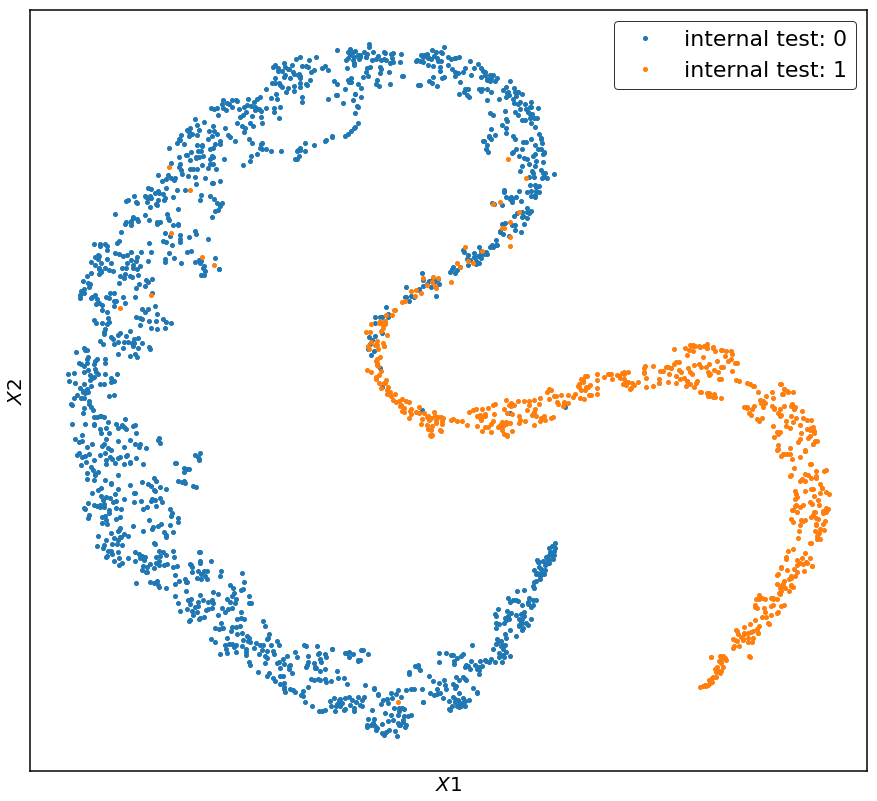

In [18]:
TSNE_plot(emb_x, Y[test_idx], class_name[:2], class_idx = [0, 1], 
          save_path = './results/t_SNE_testing_dataset')

## 3.2. external validation dataset

In [19]:
valid_idx = np.hstack([np.where(Y == 2)[0], np.where(Y == 3)[0]])

In [20]:
emb_x = TSNE(n_components=2, perplexity = 30).fit_transform(X[valid_idx])

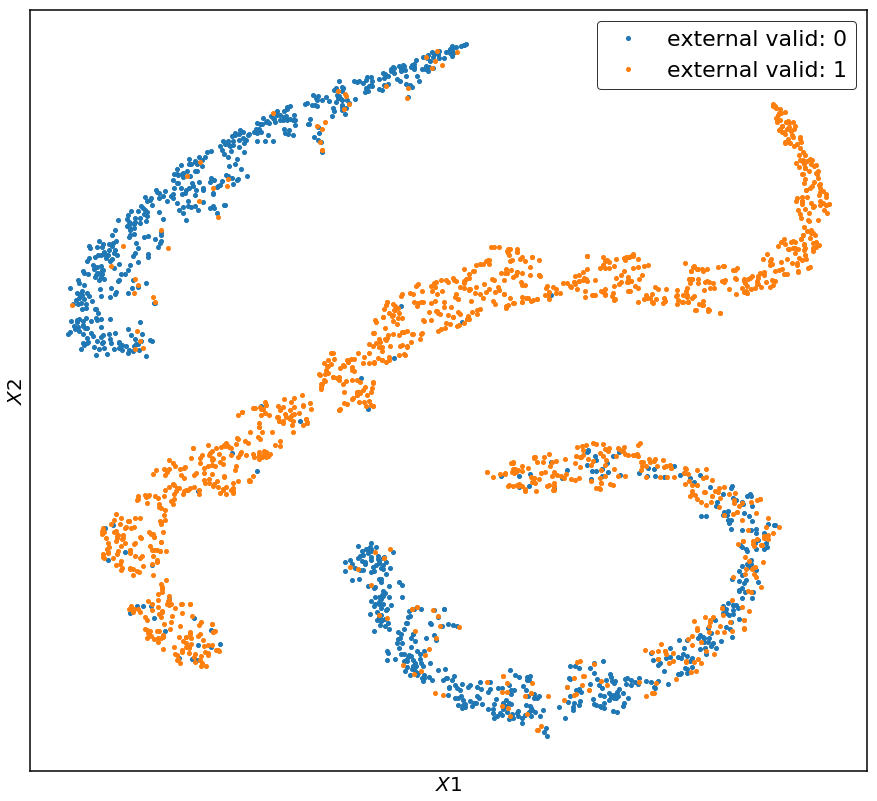

In [21]:
TSNE_plot(emb_x, Y[valid_idx], class_name[2:], class_idx = [2, 3], 
          save_path = './results/t_SNE_validation_dataset')

## 3.3. total

In [22]:
emb_x = TSNE(n_components=2, perplexity = 30).fit_transform(X)

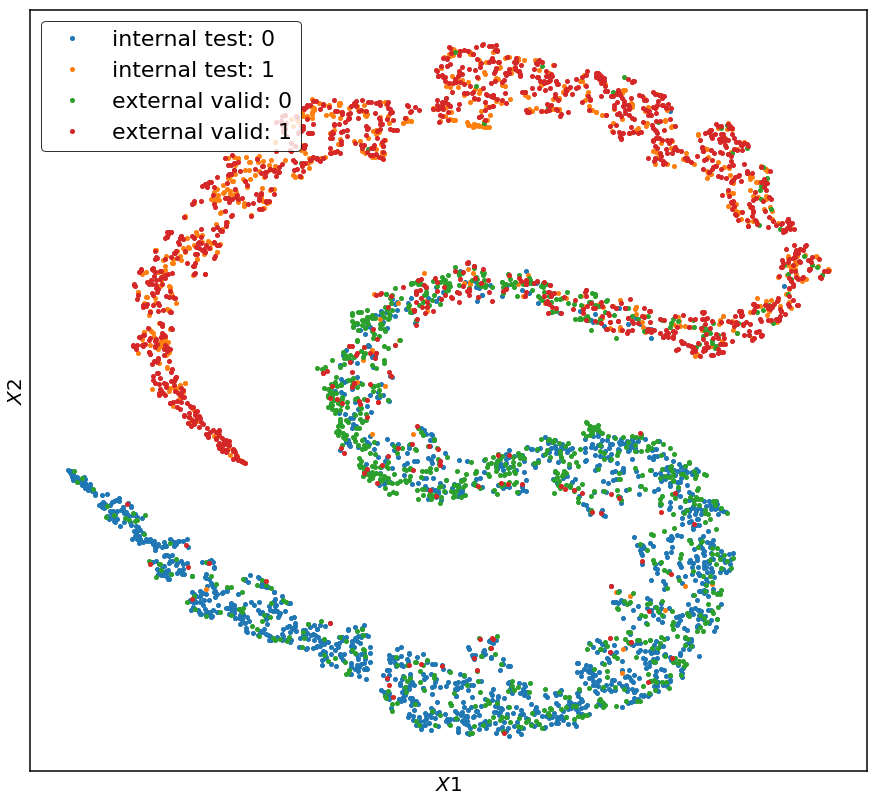

In [23]:
TSNE_plot(emb_x, Y, class_name, class_idx = [0, 1, 2, 3], 
          save_path = './results/t_SNE_testing_validation')

# 4. 3d plot

In [114]:
emb_x = TSNE(n_components=3, perplexity = 50).fit_transform(X)

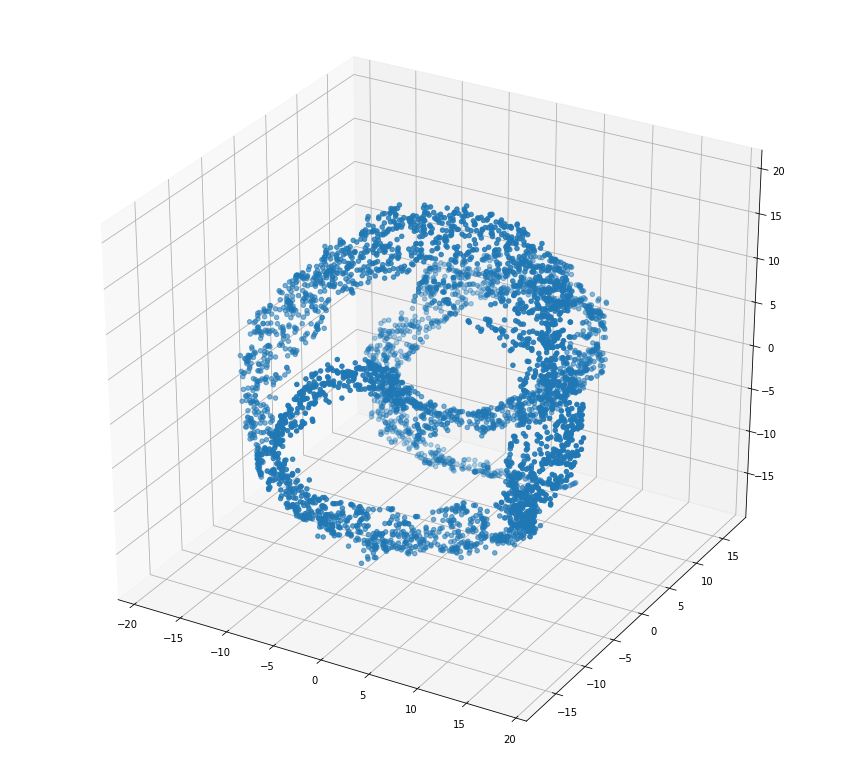

In [119]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize= (15, 14))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(emb_x[:, 0], emb_x[:, 1], emb_x[:, 2])

In [141]:
def TSNE_3d_plot(emb_x, y, class_name=['No mustache', 'Mustache'], class_idx = [0, 1], save_path = None):

    fig = plt.figure(figsize= (15, 14))
    ax = fig.add_subplot(111, projection = '3d')
    N_class = int(np.max(y))
    for n, i in enumerate(class_idx):
#     for i in range(N_class + 1):
        ax.scatter(emb_x[np.where(y==i)[0], 0], emb_x[np.where(y==i)[0], 1], emb_x[np.where(y==i)[0], 2], 
                   marker = 'o', edgecolors ='k', alpha = 0.5, 
                   label = '{}'.format(class_name[n]))
                   
    ax.legend(fontsize = 17, borderpad = 0.4, edgecolor = 'k')
    ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
    ax.set_xlabel('$X1$', fontsize = 20)
    ax.set_ylabel('$X2$', fontsize = 20)
    ax.set_zlabel('$X3$', fontsize = 20)
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.grid()
    fig.show()
    
    if not save_path == None:
        save_dir = '/'.join(save_path.split('/')[:-1])
        if not os.path.exists(save_dir): os.mkdir(save_dir)
        fig.savefig(save_path, bbox_inches='tight')
#             fig.close(fig)

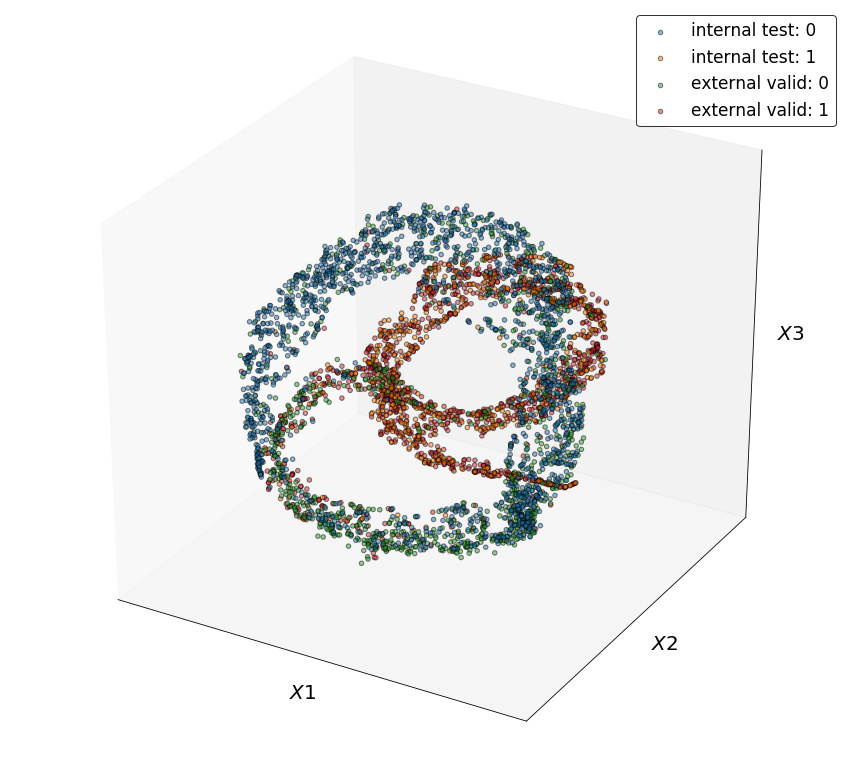

In [142]:
TSNE_3d_plot(emb_x, Y, class_name, class_idx = [0, 1, 2, 3])